In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [2]:
class World:
    def __init__(self, time_span, time_interval, map_size=np.array([10, 10]).T, debug=False, timeShow="time"):
        self.objects = []  
        self.debug = debug
        self.time_span = time_span
        self.time_interval = time_interval
        self.map_size = map_size
        self.timeShow = timeShow
        
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-self.map_size[0], self.map_size[0])
        ax.set_ylim(-self.map_size[1], self.map_size[1])
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)
        
        elems = []
        
        if self.debug:        
            for i in range(int(self.time_span/self.time_interval)): self.one_step(i, elems, ax)
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=int(self.time_span/self.time_interval)+1, interval=int(self.time_interval*1000), repeat=False)
            plt.show()
        
    def one_step(self, i, elems, ax):
        while elems: elems.pop().remove()
         
        if(self.timeShow == "time"):
            time_str = "t = %.2f[s]" % (self.time_interval*i)
        elif(self.timeShow == "step"):
            time_str = "step = " + str(i)
        else:
            time_str = ""

        elems.append(
            ax.text(
                -self.map_size[0]*0.95,
                self.map_size[1]*0.9,
                time_str,
                fontsize=10
            )
        )
        
        for obj in self.objects:
            obj.draw(ax, elems)
            if hasattr(obj, "one_step"): obj.one_step(self.time_interval)

In [3]:
class Map:
    def __init__(self, goal=np.array([0, 0]).T, map_size=np.array([10, 10]).T):
        self.goal_pos = goal
        self.map_size = map_size
        self.obstacles = []
        
    def append_obstacle(self, obstacle):
        obstacle.id = len(self.obstacles)
        self.obstacles.append(obstacle)
    
    def draw(self, ax, elems):
        c = ax.scatter(
                self.goal_pos[0]+0.034*self.map_size[0],
                self.goal_pos[1]+0.1*self.map_size[1],
                s=50,
                marker=">",
                label="landmarks",
                color="red"
            )
        elems += ax.plot(
            [self.goal_pos[0], self.goal_pos[0]],
            [self.goal_pos[1], self.goal_pos[1]+0.13*self.map_size[1]],
            color="black"
        )
        for lm in self.obstacles: lm.draw(ax, elems)

In [4]:
class Obstacle:
    def __init__(self, x, y):
        self.pos = np.array([x, y]).T
        self.id = None
    
    def draw(self, ax, elems):
        c = ax.scatter(self.pos[0], self.pos[1], s=10, marker="o", label="landmarks", color="black")
        elems.append(c)

<IPython.core.display.Javascript object>


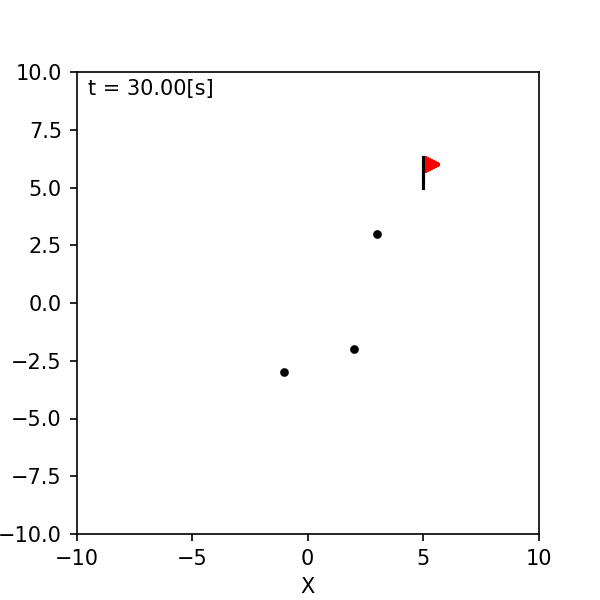

In [5]:
if __name__ == "__main__":
    time_span = 30
    time_interval = 0.1
    
    goal = [5, 5]
    map_size = [10, 10]
    
    world = World(30, 0.1, debug=False, map_size=map_size)

    m = Map(goal=goal, map_size=map_size)
    m.append_obstacle(Obstacle(2, -2))
    m.append_obstacle(Obstacle(-1, -3))
    m.append_obstacle(Obstacle(3, 3))
    world.append(m)
    
    world.draw()